In [1]:
import numpy as np
import pandas as pd

from scipy.interpolate import splrep, splev
from scipy.signal import savgol_filter
import os, re

%matplotlib widget
from matplotlib import pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cmx

import pickle

# density clustering using HDBSCAN* algorithm
#import hdbscan

# dimensionality reduction using UMAP
#import umap

In [2]:

def import_trce_file(file_path, n_rows = 1e5, resample = True, x_range = [-7.8, -4.2], pts = 1000):
    ''' Import TRCE Data from File
    
        Parse raw trce transient data (voltage over time), resample over logspace using b-spline interpolation
    
    Args:
        file_path (str): full file path for trce data file including extension
        n_rows (int): number of data rows in file
        x_range (list): logspace exponents for time axis resample [min, max]
        pts (int): number of points to resample to over range
    
    Returns:
        data (np.array): time, voltage data resamples on logspace
    '''
    
    # import raw data from file
    data = np.loadtxt(file_path, delimiter = ',', skiprows = 15, max_rows = int(n_rows))
    
    # check resample over time axis
    if resample:
        
        # generate b-spline of voltage over time
        spl = splrep(x = data[:,0], y = data[:,1])
        
        # define resample axis
        x = np.logspace(x_range[0], x_range[1], int(pts))
        
        # compute interpolation resample
        y = splev(x, spl)
        
        # stack axis into array
        data = np.vstack([x, y]).T
        
    # return imported, resampled trce data
    return data


def import_trce_data(db, base_path, params, parse_string, param_filter):
    ''' Import TRCE Data
    
        Import trce data and file name parameters from files within a directory matching parse string
    
    Args:
        db (list): database instance
        base_path (str): directory path to search for data files
        params (dict): data parameters
        parse_string (str): file name parameter syntax for parsing
        param_filter (dict): parameter filter set to match 
    
    Returns:
        (none): database instance updated with imported trce data
    '''
    # generate data file list from directory search
    files_list = [ f for f in os.listdir(base_path) ]

    # extract list of named parameters from file name using parse string
    params_list = re.findall('<([^<>]*)>', parse_string)

    # iterate data files
    for file_name in files_list:

        # parse filename for parameters, ensure match to parse string
        re_name = re.search(parse_string, file_name)
        if re_name is not None:

            # extract and store parameters from file name
            params = { **params,
                **{ params_list[i]:re_name.group(params_list[i]) for i in range(len(params_list)) }}

            # filter files based on parameter match to pre-defined filter set
            if sum([ 1 for k, v in param_filter.items() if params[k] not in v ]) == 0:

                # import data from file
                data = import_trce_file(file_path = '{}/{}'.format(base_path, file_name))

                # store extracted data and parameters in database instance
                db.append( {'data': data, 'params': params } )
                
                print('data imported from {}'.format(file_name))



In [3]:
# initialise database
db = []

# set directory for data files
base_path = '../data/15-04-01/21'


In [4]:
## import biased time resolved charge extraction transients under illumination

# define parameters
params = {}

# define file name parameter syntax for parsing
parse_string = '^trcev-(?P<sample>\d{2})-(?P<int>\d+uJ)-(?P<vlt>\d+V)-(?P<del>\d+.s)\.csv$'

# define filter parameters to match
#param_filter = {'int': ['10uJ'], 'vlt': ['2V'], 'del': ['100ns']}
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path,
                 params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trcev-21-1uJ-2V-10ms.csv
data imported from trcev-21-32uJ-15V-200ns.csv
data imported from trcev-21-10uJ-05V-200us.csv
data imported from trcev-21-1uJ-05V-2us.csv
data imported from trcev-21-3uJ-05V-50us.csv
data imported from trcev-21-03uJ-1V-1ms.csv
data imported from trcev-21-32uJ-15V-50ms.csv
data imported from trcev-21-03uJ-05V-50us.csv
data imported from trcev-21-3uJ-05V-200ns.csv
data imported from trcev-21-10uJ-05V-1us.csv
data imported from trcev-21-10uJ-15V-2us.csv
data imported from trcev-21-32uJ-2V-10ms.csv
data imported from trcev-21-32uJ-05V-100ns.csv
data imported from trcev-21-10uJ-05V-500us.csv
data imported from trcev-21-10uJ-05V-1ms.csv
data imported from trcev-21-03uJ-15V-1us.csv
data imported from trcev-21-3uJ-1V-500ns.csv
data imported from trcev-21-03uJ-0V-500us.csv
data imported from trcev-21-1uJ-2V-100ns.csv
data imported from trcev-21-3uJ-2V-10ms.csv
data imported from trcev-21-3uJ-0V-5us.csv
data imported from trcev-21-32uJ-0V-2ms.csv
data 

In [5]:
## import biased time resolved charge extraction transients without illumination

# define parameters
params = {'int': 'dark'}

# define file name parameter syntax for parsing
parse_string = '^trcev-(?P<sample>\d{2})-(?P<vlt>\d+V)-dark\.csv$'

# define filter parameters to match
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path, params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trcev-21-0V-dark.csv
data imported from trcev-21-2V-dark.csv
data imported from trcev-21-1V-dark.csv
data imported from trcev-21-15V-dark.csv
data imported from trcev-21-05V-dark.csv


In [7]:

# set directory for data files
base_path = '../data/15-04-01/12'

## import biased time resolved charge extraction transients under illumination

# define parameters
params = {}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-(?P<int>\d+uJ)-(?P<del>\d+.s)\.csv$'

# define filter parameters to match
#param_filter = {'int': ['10uJ'], 'vlt': ['2V'], 'del': ['100ns']}
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path,
                 params = params, parse_string = parse_string, param_filter = param_filter)
## import biased time resolved charge extraction transients without illumination

# define parameters
params = {'int': 'dark'}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-dark\.csv$'

# define filter parameters to match
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path, params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trce-12-2V-32uJ-100us.csv
data imported from trce-12-1V-3uJ-1ms.csv
data imported from trce-12-05V-3uJ-10ms.csv
data imported from trce-12-05V-32uJ-100ns.csv
data imported from trce-12-0V-03uJ-10us.csv
data imported from trce-12-1V-10uJ-10ms.csv
data imported from trce-12-15V-10uJ-100us.csv
data imported from trce-12-1V-1uJ-100us.csv
data imported from trce-12-05V-32uJ-10us.csv
data imported from trce-12-0V-10uJ-1ms.csv
data imported from trce-12-1V-3uJ-1us.csv
data imported from trce-12-2V-03uJ-100us.csv
data imported from trce-12-05V-3uJ-100ns.csv
data imported from trce-12-0V-1uJ-10ms.csv
data imported from trce-12-05V-1uJ-100ns.csv
data imported from trce-12-0V-3uJ-1ms.csv
data imported from trce-12-0V-32uJ-10ms.csv
data imported from trce-12-15V-1uJ-10ms.csv
data imported from trce-12-2V-1uJ-10us.csv
data imported from trce-12-05V-10uJ-1us.csv
data imported from trce-12-15V-32uJ-10ms.csv
data imported from trce-12-2V-3uJ-100us.csv
data imported from trce-12-05V-

In [37]:

# set directory for data files
base_path = '../data/15-04-01/58'

## import biased time resolved charge extraction transients under illumination

# define parameters
params = {}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-(?P<int>\d+uJ)-(?P<del>\d+.s)\.csv$'

# define filter parameters to match
#param_filter = {'int': ['10uJ'], 'vlt': ['2V'], 'del': ['100ns']}
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path,
                 params = params, parse_string = parse_string, param_filter = param_filter)

## import biased time resolved charge extraction transients without illumination

# define parameters
params = {'int': 'dark'}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-dark\.csv$'

# define filter parameters to match
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path, params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trce-58-2V-1uJ-10us.csv
data imported from trce-58-2V-3uJ-1ms.csv
data imported from trce-58-0V-3uJ-1us.csv
data imported from trce-58-0V-3uJ-100ns.csv
data imported from trce-58-1V-1uJ-10us.csv
data imported from trce-58-1V-03uJ-100ns.csv
data imported from trce-58-0V-10uJ-10us.csv
data imported from trce-58-2V-1uJ-1ms.csv
data imported from trce-58-05V-3uJ-1ms.csv
data imported from trce-58-05V-03uJ-100ns.csv
data imported from trce-58-15V-32uJ-10us.csv
data imported from trce-58-2V-3uJ-1us.csv
data imported from trce-58-05V-10uJ-10ms.csv
data imported from trce-58-0V-32uJ-10us.csv
data imported from trce-58-2V-32uJ-100us.csv
data imported from trce-58-05V-32uJ-1us.csv
data imported from trce-58-05V-32uJ-100ns.csv
data imported from trce-58-1V-3uJ-100ns.csv
data imported from trce-58-05V-1uJ-100us.csv
data imported from trce-58-0V-3uJ-1ms.csv
data imported from trce-58-15V-3uJ-10us.csv
data imported from trce-58-05V-3uJ-1us.csv
data imported from trce-58-1V-03uJ-10

In [38]:

# set directory for data files
base_path = '../data/15-04-01/45'

## import biased time resolved charge extraction transients under illumination

# define parameters
params = {}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-(?P<int>\d+uJ)-(?P<del>\d+.s)\.csv$'

# define filter parameters to match
#param_filter = {'int': ['10uJ'], 'vlt': ['2V'], 'del': ['100ns']}
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path,
                 params = params, parse_string = parse_string, param_filter = param_filter)

## import biased time resolved charge extraction transients without illumination

# define parameters
params = {'int': 'dark'}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-dark\.csv$'

# define filter parameters to match
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path, params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trce-45-0V-32uJ-100us.csv
data imported from trce-45-1V-03uJ-10us.csv
data imported from trce-45-0V-03uJ-10ms.csv
data imported from trce-45-05V-32uJ-10ms.csv
data imported from trce-45-15V-1uJ-10us.csv
data imported from trce-45-2V-03uJ-1ms.csv
data imported from trce-45-1V-3uJ-100ns.csv
data imported from trce-45-0V-03uJ-1ms.csv
data imported from trce-45-1V-3uJ-1ms.csv
data imported from trce-45-05V-32uJ-100ns.csv
data imported from trce-45-2V-03uJ-100us.csv
data imported from trce-45-05V-32uJ-10us.csv
data imported from trce-45-1V-1uJ-1us.csv
data imported from trce-45-2V-32uJ-100us.csv
data imported from trce-45-1V-1uJ-10ms.csv
data imported from trce-45-15V-03uJ-100us.csv
data imported from trce-45-1V-32uJ-1us.csv
data imported from trce-45-05V-3uJ-100us.csv
data imported from trce-45-2V-03uJ-10ms.csv
data imported from trce-45-1V-3uJ-1us.csv
data imported from trce-45-05V-10uJ-10us.csv
data imported from trce-45-05V-3uJ-1us.csv
data imported from trce-45-15V-3

In [39]:

# set directory for data files
base_path = '../data/15-04-01/33'

## import biased time resolved charge extraction transients under illumination

# define parameters
params = {}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-(?P<int>\d+uJ)-(?P<del>\d+.s)\.csv$'

# define filter parameters to match
#param_filter = {'int': ['10uJ'], 'vlt': ['2V'], 'del': ['100ns']}
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path,
                 params = params, parse_string = parse_string, param_filter = param_filter)

## import biased time resolved charge extraction transients without illumination

# define parameters
params = {'int': 'dark'}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-dark\.csv$'

# define filter parameters to match
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path, params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trce-33-0V-10uJ-10ms.csv
data imported from trce-33-15V-10uJ-10us.csv
data imported from trce-33-1V-03uJ-10us.csv
data imported from trce-33-1V-3uJ-1us.csv
data imported from trce-33-05V-03uJ-100ns.csv
data imported from trce-33-15V-1uJ-1us.csv
data imported from trce-33-1V-32uJ-100ns.csv
data imported from trce-33-15V-1uJ-100us.csv
data imported from trce-33-2V-1uJ-10us.csv
data imported from trce-33-0V-3uJ-1ms.csv
data imported from trce-33-2V-03uJ-1ms.csv
data imported from trce-33-15V-3uJ-1ms.csv
data imported from trce-33-15V-10uJ-1ms.csv
data imported from trce-33-2V-1uJ-1us.csv
data imported from trce-33-1V-03uJ-1us.csv
data imported from trce-33-05V-10uJ-100us.csv
data imported from trce-33-05V-32uJ-100ns.csv
data imported from trce-33-1V-03uJ-10ms.csv
data imported from trce-33-05V-32uJ-100us.csv
data imported from trce-33-1V-32uJ-1ms.csv
data imported from trce-33-15V-03uJ-10ms.csv
data imported from trce-33-15V-32uJ-100ns.csv
data imported from trce-33-1V-

In [40]:

# set directory for data files
base_path = '../data/15-04-01/16'

## import biased time resolved charge extraction transients under illumination

# define parameters
params = {}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-(?P<int>\d+uJ)-(?P<del>\d+.s)\.csv$'

# define filter parameters to match
#param_filter = {'int': ['10uJ'], 'vlt': ['2V'], 'del': ['100ns']}
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path,
                 params = params, parse_string = parse_string, param_filter = param_filter)

## import biased time resolved charge extraction transients without illumination

# define parameters
params = {'int': 'dark'}

# define file name parameter syntax for parsing
parse_string = '^trce-(?P<sample>\d{2})-(?P<vlt>\d+V)-dark\.csv$'

# define filter parameters to match
param_filter = {}

# import data from files in directory matching filter, store in database instance
import_trce_data(db = db, base_path = base_path, params = params, parse_string = parse_string, param_filter = param_filter)


data imported from trce-16-0V-1uJ-100us.csv
data imported from trce-16-15V-3uJ-10us.csv
data imported from trce-16-15V-10uJ-100us.csv
data imported from trce-16-05V-10uJ-100us.csv
data imported from trce-16-1V-32uJ-1us.csv
data imported from trce-16-0V-10uJ-1us.csv
data imported from trce-16-0V-03uJ-1ms.csv
data imported from trce-16-0V-3uJ-1ms.csv
data imported from trce-16-0V-10uJ-1ms.csv
data imported from trce-16-1V-10uJ-1us.csv
data imported from trce-16-2V-3uJ-100us.csv
data imported from trce-16-15V-3uJ-1ms.csv
data imported from trce-16-0V-32uJ-1us.csv
data imported from trce-16-0V-1uJ-1ms.csv
data imported from trce-16-15V-03uJ-1ms.csv
data imported from trce-16-15V-1uJ-1us.csv
data imported from trce-16-15V-1uJ-10us.csv
data imported from trce-16-1V-03uJ-1us.csv
data imported from trce-16-1V-3uJ-100us.csv
data imported from trce-16-2V-32uJ-1us.csv
data imported from trce-16-15V-3uJ-100us.csv
data imported from trce-16-2V-32uJ-10ms.csv
data imported from trce-16-1V-10uJ-10ms.c

In [8]:
print(len(db))

515


In [9]:
db[0]

{'data': array([[ 1.58489319e-08, -3.34218715e-03],
        [ 1.59809872e-08, -3.61096492e-03],
        [ 1.61141428e-08, -3.95920790e-03],
        ...,
        [ 6.20572881e-05, -1.55950722e-04],
        [ 6.25743571e-05,  1.45268209e-03],
        [ 6.30957344e-05,  5.38201987e-04]]),
 'params': {'sample': '21', 'int': '1uJ', 'vlt': '2V', 'del': '10ms'}}

In [43]:
## save raw data to file

if False:

    # open binary file for writing
    with open('{}/{}'.format('../run/', 'raw-full'), 'wb') as file:
    
        # dump pickle of data storage array to file
        pickle.dump(db, file)


In [10]:
## load raw data from file

# open binary file for reading
with open('{}/{}'.format('../run/', 'raw-full'), 'rb') as file:

    # load pickled data storage array
    db = pickle.load(file)


In [11]:
## parameter mappings to dimension data

val_map = {
    # sample id to thickness in nm
    'thickness': {'source': 'sample',
                  '12': 160, '16': 160, '21': 160, '33': 160, '45': 160, '58': 160, },
    # intensity in uJ
    'intensity': {'source': 'int',
                  'dark': 0., '32uJ': 32., '10uJ': 10., '3uJ': 3., '1uJ': 1., '03uJ': .3},
    # voltage in V
    'voltage': {'source': 'vlt',
                '05V': .5, '0V': 0., '15V': 1.5, '1V': 1., '2V': 2.},
    # delay time in log10(s)
    'delay': {'source': 'del',
              '100ns': 1e-7, '100us': 1e-4, '10ms': 1e-2, '10us': 1e-5, '1ms': 1e-3, '1us': 1e-6,
              '200ns': 2e-7, '200us': 2e-4, '20ms': 2e-2, '20us': 2e-5, '2ms': 2e-3, '2us': 2e-6,
              '500ns': 5e-7, '500us': 5e-4, '50ms': 5e-2, '50us': 5e-5, '5ms': 5e-3, '5us': 5e-6,
             },
}


In [12]:
# generate properties data

# iterate nodes in database
for node in db[:]:
    
    props = {}
    
    for key, value in val_map.items():
    
        if value['source'] in node['params'].keys():
            
            props[key] = value[ node['params'][ value['source'] ] ]
                        
        else:
            props[key] = 0.
            
    node['props'] = props


In [13]:
db[0]

{'data': array([[ 1.58489319e-08, -8.29182745e-04],
        [ 1.59809872e-08, -6.13843898e-04],
        [ 1.61141428e-08, -5.38061236e-04],
        ...,
        [ 6.20572881e-05,  4.54292243e-04],
        [ 6.25743571e-05, -6.50375531e-04],
        [ 6.30957344e-05,  2.32998886e-03]]),
 'params': {'sample': '21', 'int': '10uJ', 'vlt': '05V', 'del': '1us'},
 'props': {'thickness': 160,
  'intensity': 10.0,
  'voltage': 0.5,
  'delay': 1e-06}}

In [14]:
smpls = sorted(list(set([ _['params']['sample'] for _ in db ])))
smpls

['12', '16', '21', '33', '45', '58']

In [15]:
#dels = sorted(list(set([ _['props']['delay'] for _ in db ])))[1::3]
dels = sorted(list(set([ _['props']['delay'] for _ in db ])))[1::]
dels

[1e-07,
 2e-07,
 5e-07,
 1e-06,
 2e-06,
 5e-06,
 1e-05,
 2e-05,
 5e-05,
 0.0001,
 0.0002,
 0.0005,
 0.001,
 0.002,
 0.005,
 0.01,
 0.02,
 0.05]

In [16]:
vlts = sorted(list(set([ _['props']['voltage'] for _ in db ])))

vlts

[0.0, 0.5, 1.0, 1.5, 2.0]

In [17]:
ints = sorted(list(set([ _['props']['intensity'] for _ in db ])))
ints

[0.0, 0.3, 1.0, 3.0, 10.0, 32.0]

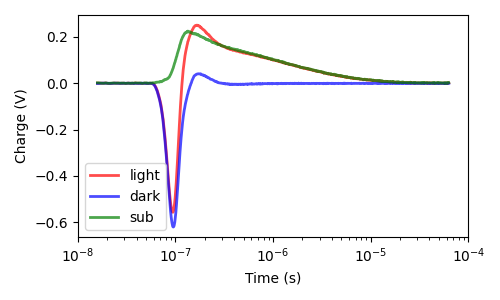

In [18]:
# select transient conditions
_int = '10uJ'
_vlt = '0V'
_del = '100ns'
_db = [ d for d in db if d['params']['vlt'] == _vlt ]

# obtain dark and illuminated voltage transients
dark = [ d for d in _db if d['params']['int'] == 'dark' ][0]['data']
light = [ d for d in _db if d['params']['int'] == _int and d['params']['del'] == _del ][0]['data']


#sub = np.vstack([dark[:,0], (light[:,1] - dark[:,1])/50. ]).T

# get time axis
t = dark[:,0]

l = light[:,1]#/50.
d = dark[:,1]#/50.

s = l-d

# calculate current transient, illuminated less dark transient, voltage over 50 Ohm res
#a = (light[:,1] - dark[:,1])/50.

# smooth and calculate derivatives
#a = savgol_filter(x = a, window_length = 45, polyorder = 2, deriv = 0)
#da = savgol_filter(x = a, window_length = 45, polyorder = 2, deriv = 1)

# initialise figure
fig = plt.figure(figsize = (5,3))
#axs = [[ fig.add_subplot(v,h,i+1) for i in range(h*v) ] for h,v in [(2,1)]][0]
axs = [[ fig.add_subplot(v,h,i+1) for i in range(h*v) ] for h,v in [(1,1)]][0]
#cnorm  = colors.Normalize(vmin = 0, vmax = 6); smap = cmx.ScalarMappable(norm = cnorm, cmap = 'Blues_r')

# plot data
axs[0].plot(t, l, '-', alpha = 0.7, linewidth = 2, label = 'light', color = 'r')
axs[0].plot(t, d, '-', alpha = 0.7, linewidth = 2, label = 'dark', color = 'b')
axs[0].plot(t, s, '-', alpha = 0.7, linewidth = 2, label = 'sub', color = 'g')


# format plots
for i in range(len(axs)):
    axs[i].set_xscale('log')
    axs[i].set_xlim(1.0e-8, 1.0e-4)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Charge (V)')
    axs[i].legend()
    
plt.tight_layout()
plt.show()
